In [33]:
from sklearn.datasets import fetch_openml
from scipy.ndimage.interpolation import shift
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_8928\1753147522.py:2: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [8]:
# Fetching MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# Get the data and target
X, y = mnist["data"], mnist["target"]

In [10]:
# Split the train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-5])

In [77]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [78]:
X.shape, y.shape

((70000, 784), (70000,))

In [79]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

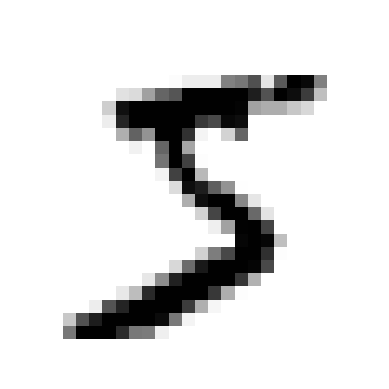

In [81]:
some_digit=X.iloc[0,:].values
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
shift_image = shift(some_digit.reshape((28,28)), [0,1], cval = 0)
shift_image = shift_image.reshape([-1])
plt.axis("off")
plt.show()


# Train using KNN model

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Predicting on some digit
knn.predict([some_digit])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

# Evaluating KNN using cross validation and confusion matrix

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predictions using cross validation on training set
knn_preds = cross_val_predict(knn, X_train, y_train, cv=3)

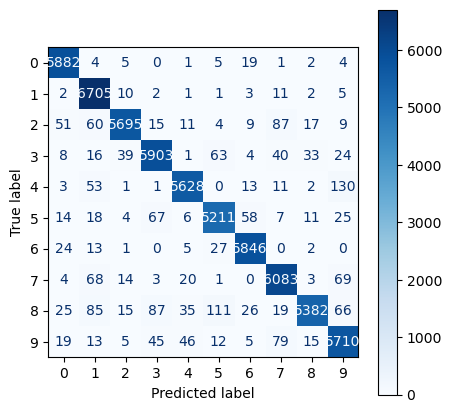

In [31]:
# Build the confusion matrix
cf_mat = confusion_matrix(y_train, knn_preds)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(5, 5))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

the cell (5, 5) shows that classifier correctly classified 5211 instances whose class was '5'. Similarly the cell (5, 6) shows that the classifier incorrectly classified 58 instances of class '5' as class '6'.


In [36]:
from sklearn.metrics import classification_report

def class_report(y, y_preds):
    print("\nClassification report:\n\n",
          classification_report(y, y_preds, digits=6))

In [37]:
class_report(y_train, knn_preds)


Classification report:

               precision    recall  f1-score   support

           0   0.975133  0.993078  0.984023      5923
           1   0.953092  0.994512  0.973361      6742
           2   0.983762  0.955858  0.969609      5958
           3   0.964070  0.962812  0.963441      6131
           4   0.978102  0.963369  0.970680      5842
           5   0.958786  0.961262  0.960022      5421
           6   0.977102  0.987834  0.982438      5918
           7   0.959766  0.970950  0.965326      6265
           8   0.984092  0.919843  0.950883      5851
           9   0.945051  0.959825  0.952381      5949

    accuracy                       0.967417     60000
   macro avg   0.967896  0.966934  0.967216     60000
weighted avg   0.967676  0.967417  0.967345     60000

